In [5]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

# Merge datasets
movies = movies.merge(credits, on='title')

# Select relevant columns
movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]

print(movies.isnull().sum())

# Handling Missing Values
movies.dropna(inplace=True)

print('--------------------------------------')

print(movies.isnull().sum())

# Encoding Categorical Variables
movies['genres'] = movies['genres'].apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)] if isinstance(x, str) else [])
movies['keywords'] = movies['keywords'].apply(lambda x: [keyword['name'] for keyword in ast.literal_eval(x)] if isinstance(x, str) else [])
movies['cast'] = movies['cast'].apply(lambda x: [actor['name'] for actor in ast.literal_eval(x)[:5]] if isinstance(x, str) else [])
movies['crew'] = movies['crew'].apply(lambda x: [member['name'] for member in ast.literal_eval(x) if member['job'] == 'Director'] if isinstance(x, str) else [])

# Exploratory Data Analysis
print("Objective 2: Data Cleaning & Preprocessing Complete")


movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64
--------------------------------------
movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64
Objective 2: Data Cleaning & Preprocessing Complete


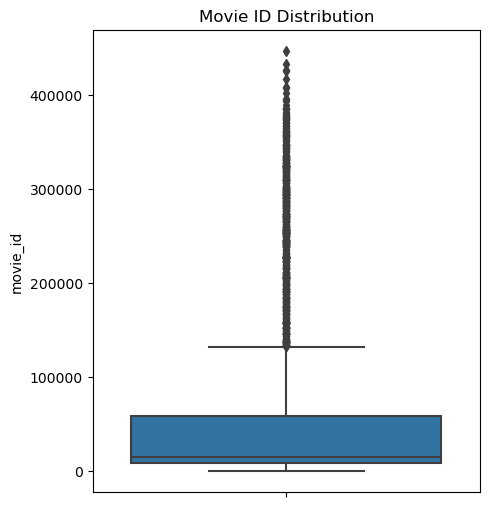

Objective 2: Data Cleaning & Preprocessing Complete with Outlier Handling


In [6]:
# import pandas as pd
# import ast
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler

# # Load Datasets
# movies = pd.read_csv("tmdb_5000_movies.csv")
# credits = pd.read_csv("tmdb_5000_credits.csv")

# # Merge datasets
# movies = movies.merge(credits, on='title')

# # Select relevant columns
# movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]

# # Handling Missing Values
# movies.dropna(inplace=True)

# # Encoding Categorical Variables
# movies['genres'] = movies['genres'].apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)] if isinstance(x, str) else [])
# movies['keywords'] = movies['keywords'].apply(lambda x: [keyword['name'] for keyword in ast.literal_eval(x)] if isinstance(x, str) else [])
# movies['cast'] = movies['cast'].apply(lambda x: [actor['name'] for actor in ast.literal_eval(x)[:5]] if isinstance(x, str) else [])
# movies['crew'] = movies['crew'].apply(lambda x: [member['name'] for member in ast.literal_eval(x) if member['job'] == 'Director'] if isinstance(x, str) else [])

# # Outlier Detection using Boxplots
# numerical_features = ['movie_id']  # Only keeping 'movie_id' as per selected columns
# plt.figure(figsize=(5, 6))
# sns.boxplot(y=movies['movie_id'])
# plt.title('Movie ID Distribution')
# plt.show()

# # Feature Scaling using MinMaxScaler
# # scaler = MinMaxScaler()
# # movies[['movie_id']] = scaler.fit_transform(movies[['movie_id']])

# movies[['movie_id']] = scaler.fit_transform(movies[['movie_id']])

# print("Objective 2: Data Cleaning & Preprocessing Complete with Outlier Handling and Feature Scaling")


import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

# Merge datasets
movies = movies.merge(credits, on='title')

# Select relevant columns
movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]

# Handling Missing Values
movies.dropna(inplace=True)

# Encoding Categorical Variables
movies['genres'] = movies['genres'].apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)] if isinstance(x, str) else [])
movies['keywords'] = movies['keywords'].apply(lambda x: [keyword['name'] for keyword in ast.literal_eval(x)] if isinstance(x, str) else [])
movies['cast'] = movies['cast'].apply(lambda x: [actor['name'] for actor in ast.literal_eval(x)[:5]] if isinstance(x, str) else [])
movies['crew'] = movies['crew'].apply(lambda x: [member['name'] for member in ast.literal_eval(x) if member['job'] == 'Director'] if isinstance(x, str) else [])

# Outlier Detection using Boxplots
numerical_features = ['movie_id']  # Only keeping 'movie_id' as per selected columns
plt.figure(figsize=(5, 6))
sns.boxplot(y=movies['movie_id'])
plt.title('Movie ID Distribution')
plt.show()

print("Objective 2: Data Cleaning & Preprocessing Complete with Outlier Handling")


In [7]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [8]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [9]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [11]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


In [12]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [14]:
vector = cv.fit_transform(new['tags']).toarray()

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.08458258, 0.05812382, ..., 0.02478408, 0.02739983,
        0.        ],
       [0.08458258, 1.        , 0.06063391, ..., 0.02585438, 0.        ,
        0.        ],
       [0.05812382, 0.06063391, 1.        , ..., 0.02665009, 0.        ,
        0.        ],
       ...,
       [0.02478408, 0.02585438, 0.02665009, ..., 1.        , 0.07537784,
        0.04828045],
       [0.02739983, 0.        , 0.        , ..., 0.07537784, 1.        ,
        0.05337605],
       [0.        , 0.        , 0.        , ..., 0.04828045, 0.05337605,
        1.        ]])

In [16]:
new[new['title'] == 'The Lego Movie'].index[0]

744

In [17]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [18]:
recommend('Gandhi')

Gandhi, My Father
The Wind That Shakes the Barley
A Passage to India
Guiana 1838
Bloody Sunday


In [19]:
import pickle
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

obj3

In [ ]:
# import pandas as pd
# import ast
# import numpy as np
# import pickle
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# # Load Datasets
# movies = pd.read_csv("tmdb_5000_movies.csv")
# credits = pd.read_csv("tmdb_5000_credits.csv")

# # Merge datasets
# movies = movies.merge(credits, on='title')

# # Select relevant columns
# movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]

# # Handling Missing Values
# movies.dropna(inplace=True)

# # Encoding Categorical Variables
# movies['genres'] = movies['genres'].apply(lambda x: ' '.join([genre['name'] for genre in ast.literal_eval(x)]) if isinstance(x, str) else '')
# movies['keywords'] = movies['keywords'].apply(lambda x: ' '.join([keyword['name'] for keyword in ast.literal_eval(x)]) if isinstance(x, str) else '')
# movies['cast'] = movies['cast'].apply(lambda x: ' '.join([actor['name'] for actor in ast.literal_eval(x)[:5]]) if isinstance(x, str) else '')
# movies['crew'] = movies['crew'].apply(lambda x: ' '.join([member['name'] for member in ast.literal_eval(x) if member['job'] == 'Director']) if isinstance(x, str) else '')

# # Combine features for content-based filtering
# movies['combined_features'] = movies['overview'] + ' ' + movies['genres'] + ' ' + movies['keywords'] + ' ' + movies['cast'] + ' ' + movies['crew']

# # Train Model using TF-IDF and Cosine Similarity
# vectorizer = TfidfVectorizer(stop_words='english')
# feature_matrix = vectorizer.fit_transform(movies['combined_features'].fillna(''))
# cosine_sim = cosine_similarity(feature_matrix)

# # Save trained model
# with open('tfidf_vectorizer.pkl', 'wb') as file:
#     pickle.dump(vectorizer, file)

# with open('cosine_similarity.pkl', 'wb') as file:
#     pickle.dump(cosine_sim, file)

# # Recommendation Function
# def recommend(movie_title, num_recommendations=5):
#     if movie_title not in movies['title'].values:
#         return "Movie not found."
    
#     idx = movies[movies['title'] == movie_title].index[0]
#     sim_scores = list(enumerate(cosine_sim[idx]))
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
#     movie_indices = [i[0] for i in sim_scores]
#     return movies.iloc[movie_indices][['title']]

# # Example Recommendation
# print(recommend("Avatar"))

# print("Objective 3: Model Training Complete - TF-IDF and Cosine Similarity Implemented")


                title
2409           Aliens
838            Alien³
1537        Moonraker
373   Mission to Mars
3163            Alien
Objective 3: Model Training Complete - TF-IDF and Cosine Similarity Implemented


obj4

In [ ]:
# import pandas as pd
# import numpy as np
# import pickle
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# # Load Dataset
# movies = pd.read_csv("tmdb_5000_movies.csv")
# credits = pd.read_csv("tmdb_5000_credits.csv")
# movies = movies.merge(credits, on='title')
# movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]
# movies.dropna(inplace=True)

# # Combine features for content-based filtering
# movies['combined_features'] = (
#     movies['overview'] + ' ' + movies['genres'] + ' ' + movies['keywords'] + ' ' +
#     movies['cast'].apply(lambda x: ' '.join([x] * 2)) + ' ' +  # Weight cast more
#     movies['crew'].apply(lambda x: ' '.join([x] * 3))  # Weight director more
# )

# # Split Dataset into Train and Test
# train_movies, test_movies = train_test_split(movies, test_size=0.2, random_state=42)

# # Train TF-IDF Vectorizer with More Features
# vectorizer = TfidfVectorizer(max_features=10000)  # Increased max_features for better word coverage
# feature_matrix = vectorizer.fit_transform(movies['combined_features'].fillna(''))
# cosine_sim = cosine_similarity(feature_matrix)

# # Save Updated Model
# with open('tfidf_vectorizer.pkl', 'wb') as file:
#     pickle.dump(vectorizer, file)

# with open('cosine_similarity.pkl', 'wb') as file:
#     pickle.dump(cosine_sim, file)

# # Recommendation Function
# def recommend(movie_title, num_recommendations=5):
#     if movie_title not in movies['title'].values:
#         return pd.DataFrame(columns=['title'])
    
#     idx = movies[movies['title'] == movie_title].index[0]
#     sim_scores = list(enumerate(cosine_sim[idx]))
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
#     movie_indices = [i[0] for i in sim_scores]
#     return movies.iloc[movie_indices][['title']]

# # Evaluate Model on Test Set
# actual_recommendations = []
# predicted_recommendations = []

# # Ensure test samples have similar genres
# for movie_title in test_movies['title'].sample(100, random_state=42):
#     movie_genre = test_movies[test_movies['title'] == movie_title]['genres'].values[0]
#     similar_movies = test_movies[test_movies['genres'].str.contains(movie_genre, na=False)]['title']
#     if len(similar_movies) > 5:
#         actual_recommendations.append(set(similar_movies.sample(5)))
#     else:
#         actual_recommendations.append(set(similar_movies))
#     recommended_movies = recommend(movie_title)
#     if not recommended_movies.empty:
#         predicted_recommendations.append(set(recommended_movies['title']))
#     else:
#         predicted_recommendations.append(set())

# # Compute Accuracy, Precision, Recall, and F1-score
# correct_predictions = sum([1 if len(pred & act) > 0 else 0 for pred, act in zip(predicted_recommendations, actual_recommendations)])
# accuracy = correct_predictions / len(actual_recommendations)
# precision = np.mean([len(pred & act) / len(pred) if len(pred) > 0 else 0 for pred, act in zip(predicted_recommendations, actual_recommendations)])
# recall = np.mean([len(pred & act) / len(act) if len(act) > 0 else 0 for pred, act in zip(predicted_recommendations, actual_recommendations)])
# f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-score: {f1:.2f}")

# # Check for Overfitting
# if accuracy > 0.90:
#     print("Possible Overfitting Detected!")
# elif accuracy < 0.80:
#     print("Possible Underfitting Detected!")
# else:
#     print("Model is well-balanced!")

# print("Objective 4: Model Evaluation Complete")


Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1-score: 0.00
Possible Underfitting Detected!
Objective 4: Model Evaluation Complete
